# Dashboard Project

SELECT
  date,
  SUM(volume_sold_liters) AS Aged_Dark_Rum,
FROM
  `bigquery-public-data.iowa_liquor_sales.sales`
WHERE
  category_name = "Aged Dark Rum"
GROUP BY
  date
ORDER BY
  date;


A similar SQL query got the sum of Gold Rum sales grouped by year.

In [1]:
import pandas as pd

In [2]:
gold_rum = pd.read_csv('Gold_Rum.csv')

In [3]:
dark_rum= pd.read_csv('Dark_Rum.csv')

In [4]:
gold_rum

,date,Gold_Rum
0,2016-08-29,127.62
1,2016-08-30,105.12
2,2016-08-31,159.99
3,2016-09-01,450.50
4,2016-09-02,216.25
...,...,...
1456,2022-03-27,1.50
1457,2022-03-28,210.62
1458,2022-03-29,265.24
1459,2022-03-30,401.73


In [5]:
gold_rum['date'] = pd.to_datetime(gold_rum['date'], errors='coerce')

In [6]:
gold_rum

,date,Gold_Rum
0,2016-08-29,127.62
1,2016-08-30,105.12
2,2016-08-31,159.99
3,2016-09-01,450.50
4,2016-09-02,216.25
...,...,...
1456,2022-03-27,1.50
1457,2022-03-28,210.62
1458,2022-03-29,265.24
1459,2022-03-30,401.73


In [7]:
gold_rum = gold_rum.assign(year = gold_rum['date'].dt.year).drop(columns='date')

In [8]:
gold_rum

,Gold_Rum,year
0,127.62,2016
1,105.12,2016
2,159.99,2016
3,450.50,2016
4,216.25,2016
...,...,...
1456,1.50,2022
1457,210.62,2022
1458,265.24,2022
1459,401.73,2022


In [9]:
gold_rum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gold_Rum  1461 non-null   float64
 1   year      1461 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.0 KB


In [10]:
gold_rum.columns = gold_rum.columns.str.replace('Gold_Rum', 'Gold_Rum_by_Liter')

In [11]:
gold_rum = gold_rum.groupby(gold_rum.year).sum()

In [12]:
gold_rum

,Gold_Rum_by_Liter
year,
2016,45043.52
2017,115316.60
2018,109159.17
2019,107731.52
2020,112782.87
2021,100701.62
2022,20404.25


In [13]:
dark_rum

,date,Aged_Dark_Rum
0,2016-08-29,34.25
1,2016-08-30,15.50
2,2016-08-31,42.85
3,2016-09-01,99.50
4,2016-09-02,56.75
...,...,...
1452,2022-03-25,97.75
1453,2022-03-28,124.50
1454,2022-03-29,78.00
1455,2022-03-30,263.50


In [14]:
dark_rum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1457 non-null   object 
 1   Aged_Dark_Rum  1457 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.9+ KB


In [15]:
dark_rum['date'] = pd.to_datetime(dark_rum['date'], errors='coerce')

In [16]:
dark_rum

,date,Aged_Dark_Rum
0,2016-08-29,34.25
1,2016-08-30,15.50
2,2016-08-31,42.85
3,2016-09-01,99.50
4,2016-09-02,56.75
...,...,...
1452,2022-03-25,97.75
1453,2022-03-28,124.50
1454,2022-03-29,78.00
1455,2022-03-30,263.50


In [17]:
dark_rum = dark_rum.assign(year = dark_rum['date'].dt.year).drop(columns='date')

In [18]:
dark_rum

,Aged_Dark_Rum,year
0,34.25,2016
1,15.50,2016
2,42.85,2016
3,99.50,2016
4,56.75,2016
...,...,...
1452,97.75,2022
1453,124.50,2022
1454,78.00,2022
1455,263.50,2022


In [19]:
dark_rum.columns = dark_rum.columns.str.replace('Dark_Rum', 'Dark_Rum_by_Liter')

In [20]:
dark_rum.columns = dark_rum.columns.str.replace(' ', '')

In [22]:
dark_rum = dark_rum.groupby(dark_rum.year).sum()

In [23]:
dark_rum

,Aged_Dark_Rum_by_Liter
year,
2016,9803.35
2017,28718.75
2018,35611.05
2019,31512.75
2020,35335.50
2021,42201.20
2022,9120.75


In [25]:
gold_and_dark_rum = pd.merge(gold_rum, dark_rum, left_index=True, right_index=True)

In [26]:
gold_and_dark_rum

,Gold_Rum_by_Liter,Aged_Dark_Rum_by_Liter
year,,
2016,45043.52,9803.35
2017,115316.60,28718.75
2018,109159.17,35611.05
2019,107731.52,31512.75
2020,112782.87,35335.50
2021,100701.62,42201.20
2022,20404.25,9120.75


<AxesSubplot:xlabel='year'>

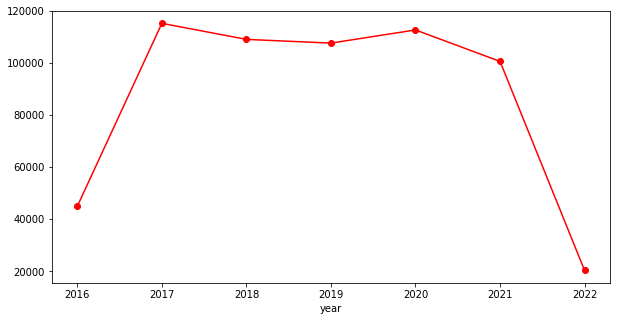

In [28]:
gold_and_dark_rum['Gold_Rum_by_Liter'].plot(figsize = (10,5), marker = 'o', color = 'r')

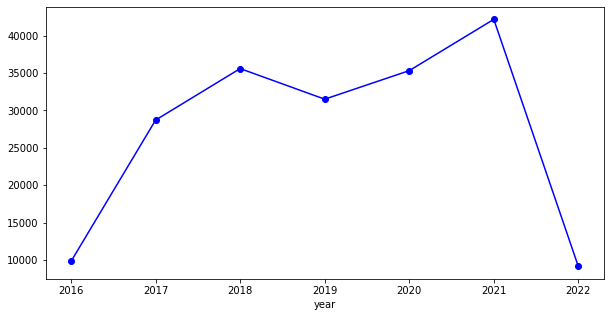

In [29]:
gold_and_dark_rum['Aged_Dark_Rum_by_Liter'].plot(figsize = (10,5), marker = 'o', color = 'b');

In [30]:
from plotly.subplots import make_subplots # imports # imports plotly
import plotly.graph_objects as go # imports plotly graph objects as go

fig = make_subplots(rows=3, cols=1) # makes sublots that stack underneath each other

fig.append_trace(go.Scatter( # makes first plot - it is a line graph
    x=gold_and_dark_rum.index,
    y=gold_and_dark_rum['Gold_Rum_by_Liter'],
    name="Gold Rum"
), row=1, col=1)

fig.append_trace(go.Scatter( # makes second plot - it is a line graph
    x=gold_and_dark_rum.index,
    y=gold_and_dark_rum['Aged_Dark_Rum_by_Liter'],
    name="Dark_Rum"
), row=2, col=1)

fig.append_trace(go.Bar(
    x=['Gold_Rum_by_Liter', 'Aged_Dark_Rum_by_Liter'],
    y=[gold_and_dark_rum['Gold_Rum_by_Liter'].sum(),gold_and_dark_rum['Aged_Dark_Rum_by_Liter'].sum()],
    marker=dict(color=['royalblue','gold']),
    showlegend=False,
    name = 'Totals'
), row=3, col=1)

fig.update_layout(height=1200, width=1200, title_text="Gold Rum Vs Dark Rum")
fig.show()

In [31]:
fig.write_html("index.html")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=565854d8-8407-4951-a97d-d5536b425056' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>